# Fraud Detection Project using PaySim Dataset

## Prepared by:** Bahar Almasi**  
## Role:** Data Science Student  
## Project Type:** EDA + Classification + Regression Modeling  
### Date:** July 2025 **

---

### Project Objective:The goal of this project is to perform exploratory data analysis and build predictive models to detect fraudulent financial transactions using the PaySim dataset. Both classification and regression techniques will be applied.


# PaySim simulates mobile money transactions based on a sample of real transactions from one month of financial logs from a mobile money service implemented in an African country.During this project, I worked on exploring the data and building a predictive models to determine whether or not transactions are fraudulent.

| Feature             | Description                                                    | Data Type |
|---------------------|----------------------------------------------------------------|-----------|
| step                | Simulation step number (unit: hour)                            | int       |
| type                | Type of transaction (e.g., CASH_OUT, PAYMENT)                  | object    |
| amount              | Amount of the transaction                                      | float     |
| nameOrig            | Customer ID of the originator (sender)                         | object    |
| oldbalanceOrg       | Balance of originator before the transaction                   | float     |
| newbalanceOrig      | Balance of originator after the transaction                    | float     |
| nameDest            | Customer ID of the destination (receiver)                      | object    |
| oldbalanceDest      | Balance of destination before the transaction                  | float     |
| newbalanceDest      | Balance of destination after the transaction                   | float     |
| isFraud             | Indicates whether the transaction is fraudulent (1 or 0)       | int       |
| isFlaggedFraud      | Indicates whether the transaction was flagged as fraud         | int       |
| log_amount          | Log-transformed transaction amount                             | float     |
| log_oldbalanceOrg   | Log-transformed balance of originator before transaction       | float     |
| log_newbalanceOrig  | Log-transformed balance of originator after transaction        | float     |
| log_oldbalanceDest  | Log-transformed balance of destination before transaction      | float     |
| log_newbalanceDest  | Log-transformed balance of destination after transaction       | float     |
| day                 | Simulated day of the transaction (derived from step)           | int       |
| hour                | Simulated hour of the transaction (derived from step)          | int       |
| step_segment        | Categorical segment of step (early, mid, late, final)          | category  |


In [3]:
# ------------------------------
#  Data Visualization
# ------------------------------
import matplotlib.pyplot as plt      # For creating static plots and charts
import seaborn as sns               # For advanced statistical visualizations

# ------------------------------
#  Statistical Tests
# ------------------------------
from scipy.stats import pearsonr           # For calculating Pearson correlation coefficient
from scipy.stats import mannwhitneyu       # Non-parametric test to compare two groups
from scipy.stats import chi2_contingency   # Chi-square test for categorical variables
import scipy.stats as stats                # General access to statistical functions

# ------------------------------
#  Multicollinearity Check
# ------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF calculation
from statsmodels.tools.tools import add_constant                           # To add constant for regression stats

# ------------------------------
#  Data Handling
# ------------------------------
import pandas as pd                # Data manipulation and analysis
import numpy as np                 # Numerical computing and array operations

# ------------------------------
#  Preprocessing & Splitting
# ------------------------------
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import StandardScaler       # Standardizes features by removing mean and scaling to unit variance
from sklearn.preprocessing import RobustScaler         # Scales features while minimizing the influence of outliers

# ------------------------------
#  ML Models – Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier        # Decision Tree for classification
from sklearn.ensemble import RandomForestClassifier    # Ensemble learning with Random Forest
from xgboost import XGBClassifier                      # Extreme Gradient Boosting classifier

# ------------------------------
#  Handling Imbalanced Data
# ------------------------------
from imblearn.over_sampling import SMOTE               # Synthetic Minority Over-sampling Technique

# ------------------------------
#  Model Evaluation Metrics – Classification
# ------------------------------
from sklearn.metrics import (
    classification_report,      # Full classification metrics summary
    confusion_matrix,           # Confusion matrix
    accuracy_score,             # Accuracy score
    precision_score,            # Precision
    recall_score,               # Recall
    f1_score,                   # F1 Score
    roc_auc_score,              # ROC AUC score
    roc_curve                   # ROC curve plotting
)

# ------------------------------
#  Hyperparameter Tuning
# ------------------------------
from sklearn.model_selection import GridSearchCV       # Performs exhaustive search over specified parameter values

# ------------------------------
# ML Models – Regression
# ------------------------------
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.tree import DecisionTreeRegressor         # Decision Tree for regression

# ------------------------------
#  Model Evaluation Metrics – Regression
# ------------------------------
from sklearn.metrics import r2_score, mean_squared_error  # R² and RMSE for regression performance
from sklearn.model_selection import KFold


In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install kaggle


In [13]:
!unzip -o paysim1.zip



Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [14]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [21]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [23]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Outliers Detection(Tuky Method)

In [27]:

# Select only numeric columns from the dataset
numeric_cols = df.select_dtypes(include=np.number).columns

# Create a dictionary to store outlier counts per column
outlier_summary = {}

# Loop through each numeric column
for col in numeric_cols:
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find all outliers in the current column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Store the number of outliers found
    outlier_summary[col] = len(outliers)

# Print out the number of outliers found in each numeric column
print("Outlier counts using Tukey method:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Outlier counts using Tukey method:
step: 102688 outliers
amount: 338078 outliers
oldbalanceOrg: 1112507 outliers
newbalanceOrig: 1053391 outliers
oldbalanceDest: 786135 outliers
newbalanceDest: 738527 outliers
isFraud: 8213 outliers
isFlaggedFraud: 16 outliers


# Handle Outliers:

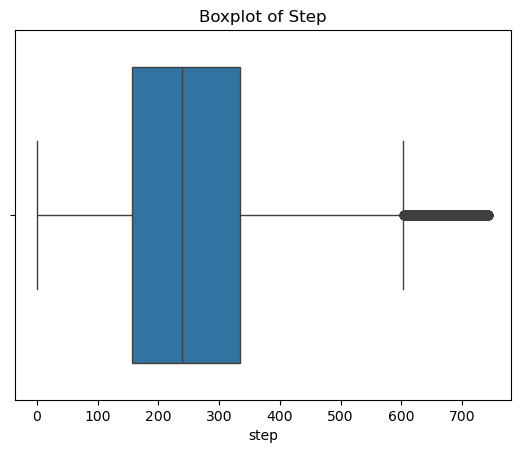

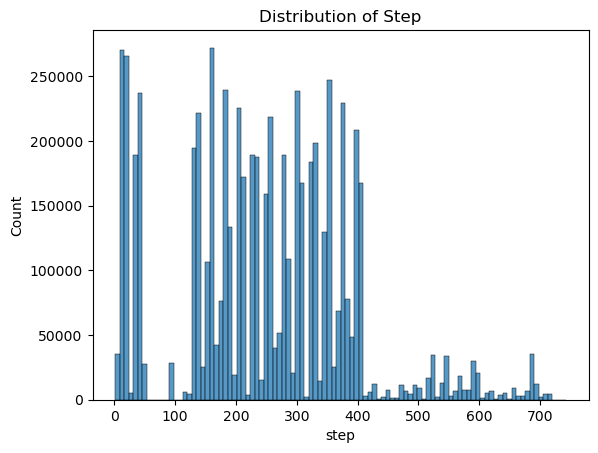

In [30]:
sns.boxplot(x=df['step'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='step', bins=100)
plt.title("Distribution of Step")
plt.show()

#### Handling Outliers in step:Although the boxplot shows outliers for values greater than 600, these are not actual anomalies. The step variable represents time steps (likely hours), and the dataset simulates a 30-day period (744 steps). The higher step values simply correspond to later periods in the simulation. These are not errors or noise — just less frequent data points from the end of the simulation.Conclusion: We will keep the outliers in step, as they are part of the dataset’s natural structure.



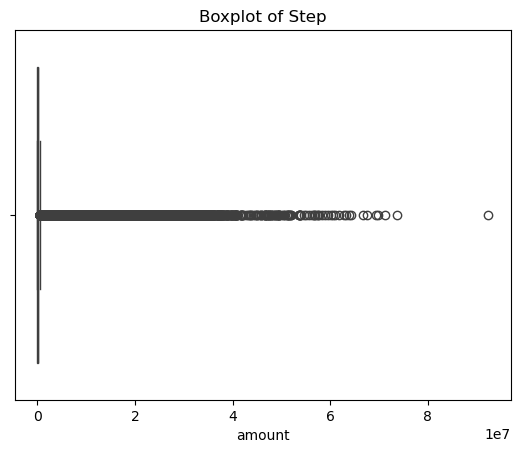

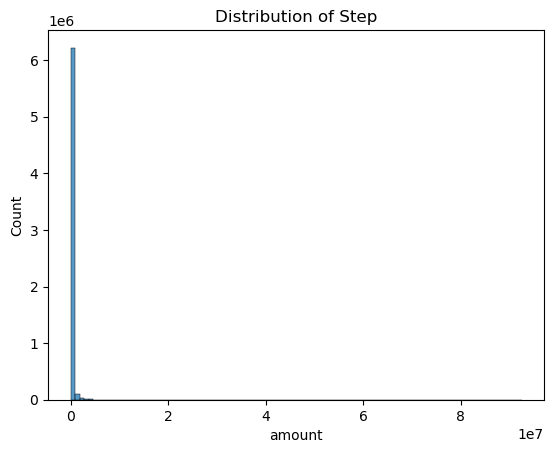

In [34]:
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='amount', bins=100)
plt.title("Distribution of Step")
plt.show()

#### The boxplot for amount shows a large number of extreme values (outliers) on the right side, indicating a heavily right-skewed distribution. The histogram further confirms this, as the vast majority of transaction amounts are concentrated near zero, while a few transactions involve very large sums.

#### Conclusion:Due to the extreme skewness and presence of high-value outliers, it's recommended to apply a log transformation (e.g., log(amount + 1)) to reduce skewness and normalize the distribution for better model performance.



###### The original amount variable was highly right-skewed, with extreme outliers. After applying a log1p transformation, the distribution became more normalized and smooth, making it more suitable for statistical modeling and machine learning. This transformation reduces the influence of large transaction values and improves model performance.

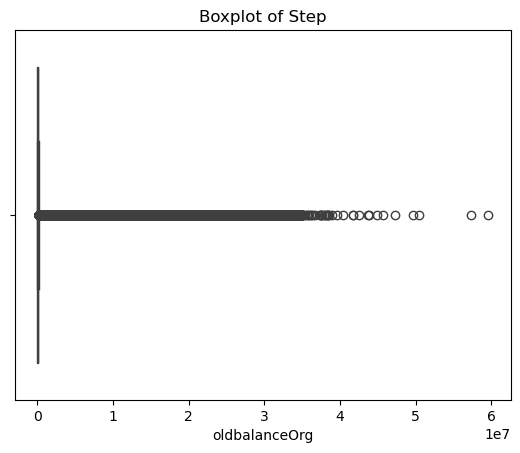

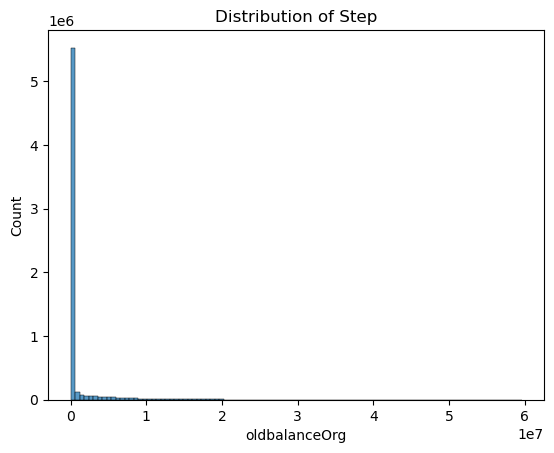

In [38]:
sns.boxplot(x=df['oldbalanceOrg'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='oldbalanceOrg', bins=100)
plt.title("Distribution of Step")
plt.show()

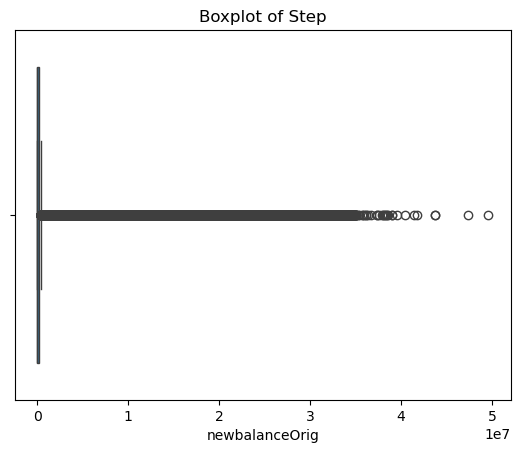

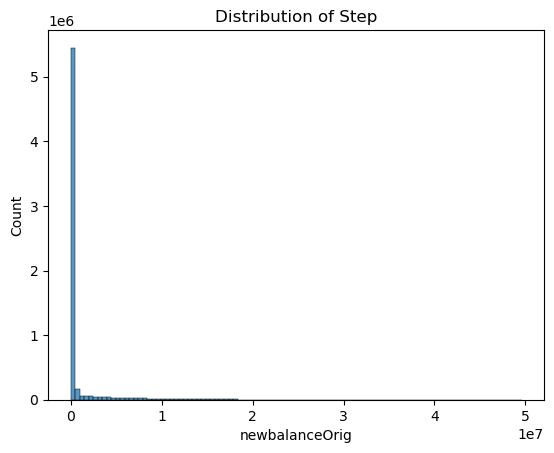

In [40]:
sns.boxplot(x=df['newbalanceOrig'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='newbalanceOrig', bins=100)
plt.title("Distribution of Step")
plt.show()

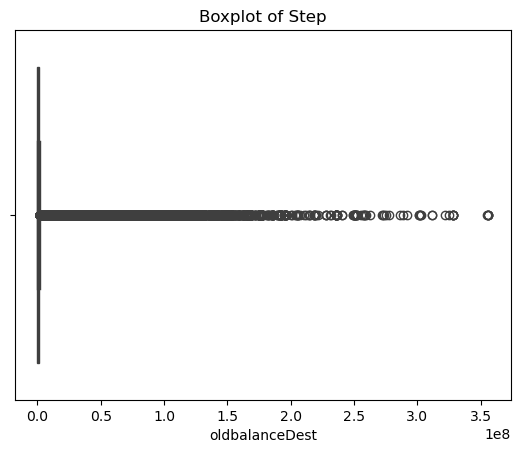

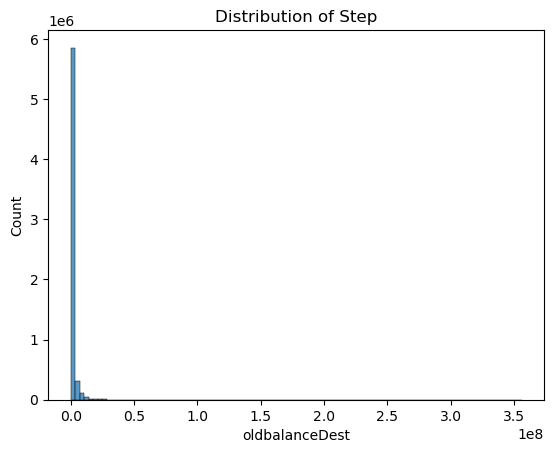

In [42]:
sns.boxplot(x=df['oldbalanceDest'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='oldbalanceDest', bins=100)
plt.title("Distribution of Step")
plt.show()

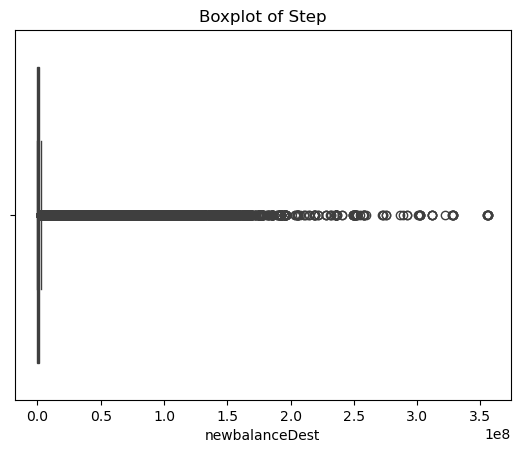

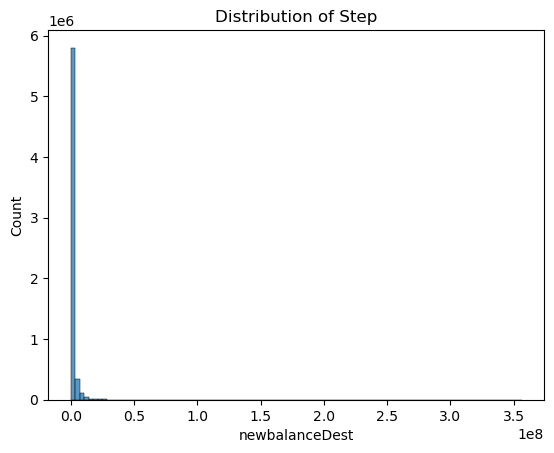

In [44]:
sns.boxplot(x=df['newbalanceDest'])
plt.title("Boxplot of Step")
plt.show()

sns.histplot(data=df, x='newbalanceDest', bins=100)
plt.title("Distribution of Step")
plt.show()

In [25]:

df['log_amount'] = np.log(df['amount'] + 1)
df['log_oldbalanceOrg'] = np.log(df['oldbalanceOrg'] + 1)
df['log_newbalanceOrig'] = np.log(df['newbalanceOrig'] + 1)
df['log_oldbalanceDest'] = np.log(df['oldbalanceDest'] + 1)
df['log_newbalanceDest'] = np.log(df['newbalanceDest'] + 1)


In [27]:
df['day'] = df['step'] // 24
df['hour'] = df['step'] % 24

In [29]:
df['step_segment'] = pd.cut(df['step'], 
                                 bins=[0, 200, 400, 600, 743], 
                                 labels=['early', 'mid', 'late', 'final'])


In [31]:
df['step_segment'] = pd.cut(df['step'], bins=[0, 200, 400, 600, 743], labels=['early', 'mid', 'late', 'final'])


In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_oldbalanceDest,log_newbalanceDest,day,hour,step_segment
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9.194276,12.044359,11.984786,0.000000,0.0,0,1,early
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,7.531166,9.964112,9.872292,0.000000,0.0,0,1,early
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,5.204007,5.204007,0.000000,0.000000,0.0,0,1,early
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,5.204007,5.204007,0.000000,9.960954,0.0,0,1,early
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,9.364703,10.634773,10.305174,0.000000,0.0,0,1,early


In [57]:
df.isnull().sum()

step                  0
type                  0
amount                0
nameOrig              0
oldbalanceOrg         0
newbalanceOrig        0
nameDest              0
oldbalanceDest        0
newbalanceDest        0
isFraud               0
isFlaggedFraud        0
log_amount            0
log_oldbalanceOrg     0
log_newbalanceOrig    0
log_oldbalanceDest    0
log_newbalanceDest    0
day                   0
hour                  0
step_segment          0
dtype: int64

In [59]:
df.duplicated().sum()

0

# Numerical Univariate***********************************

--- step ---
count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64


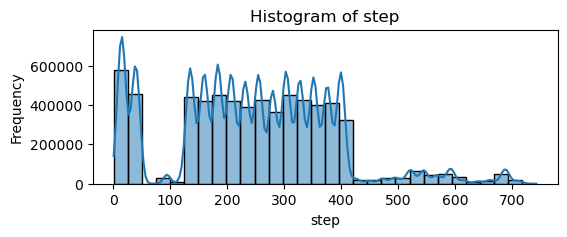

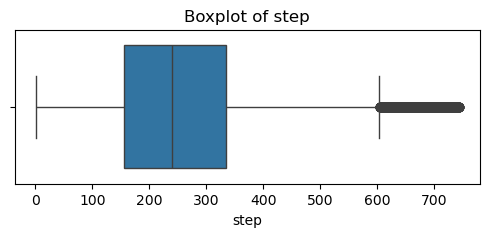

--- amount ---
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


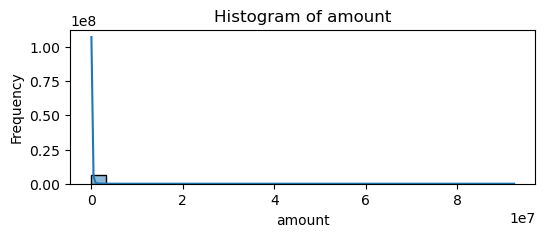

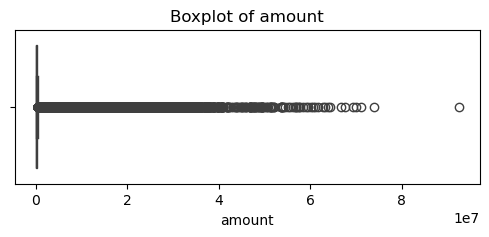

--- oldbalanceOrg ---
count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64


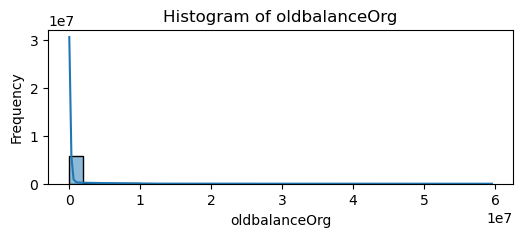

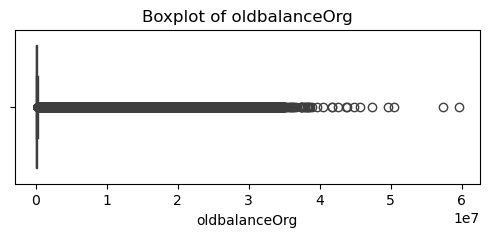

--- newbalanceOrig ---
count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64


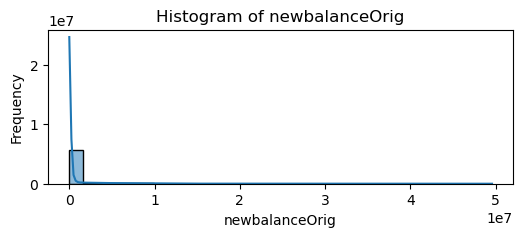

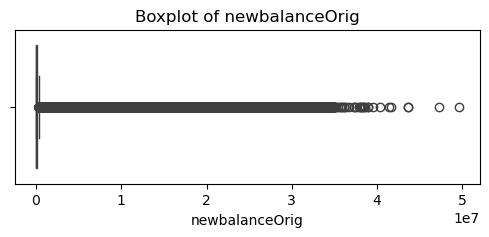

--- oldbalanceDest ---
count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64


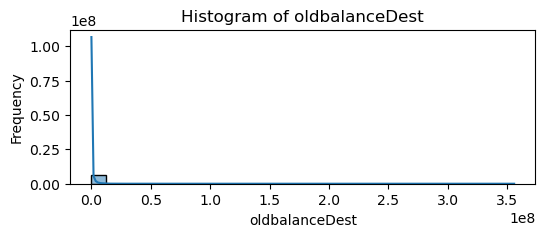

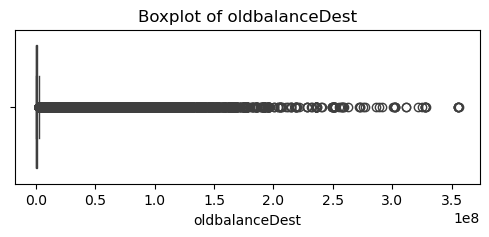

--- newbalanceDest ---
count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64


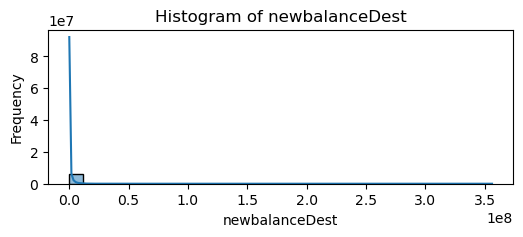

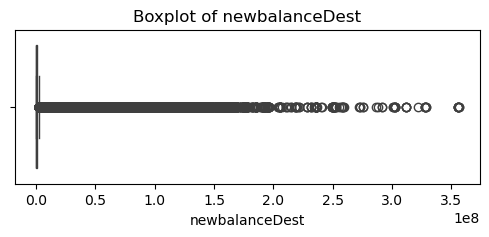

--- isFraud ---
count    6.362620e+06
mean     1.290820e-03
std      3.590480e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64


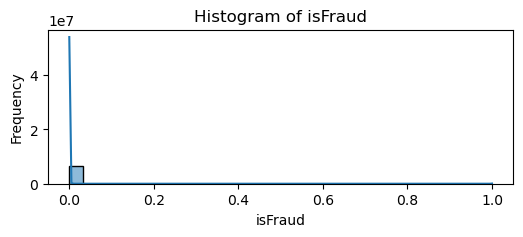

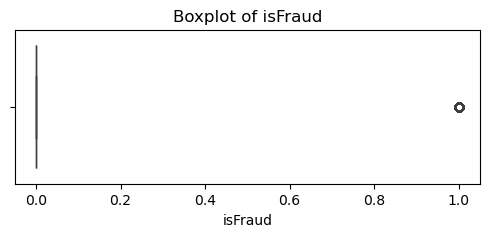

--- isFlaggedFraud ---
count    6.362620e+06
mean     2.514687e-06
std      1.585775e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFlaggedFraud, dtype: float64


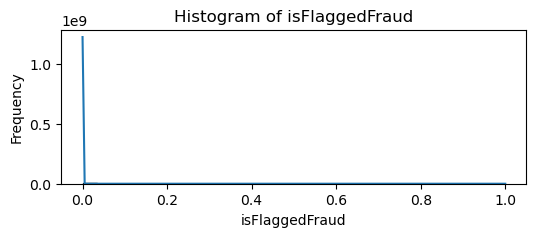

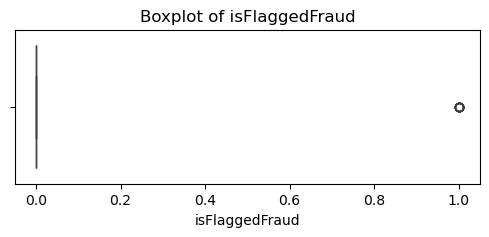

--- log_amount ---
count    6.362620e+06
mean     1.084087e+01
std      1.814509e+00
min      0.000000e+00
25%      9.502306e+00
50%      1.122355e+01
75%      1.224876e+01
max      1.834213e+01
Name: log_amount, dtype: float64


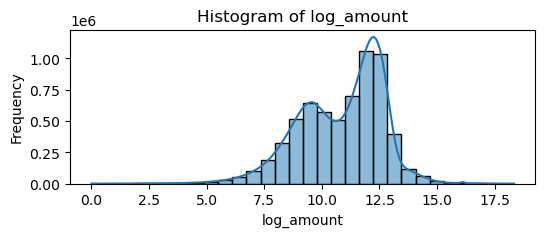

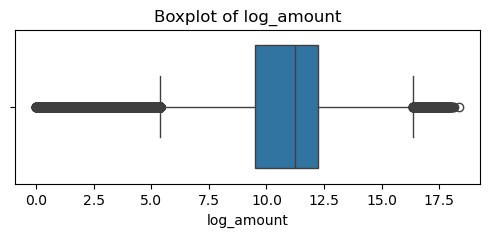

--- log_oldbalanceOrg ---
count    6.362620e+06
mean     7.414574e+00
std      5.669756e+00
min      0.000000e+00
25%      0.000000e+00
50%      9.561631e+00
75%      1.158353e+01
max      1.790292e+01
Name: log_oldbalanceOrg, dtype: float64


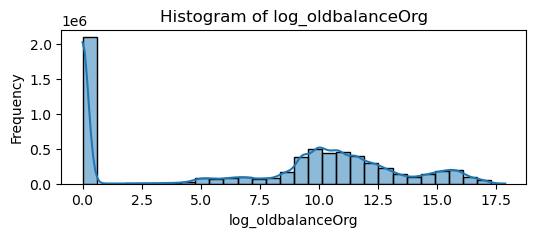

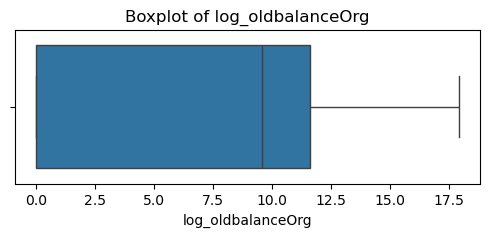

--- log_newbalanceOrig ---
count    6.362620e+06
mean     5.366092e+00
std      6.330024e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.187937e+01
max      1.771920e+01
Name: log_newbalanceOrig, dtype: float64


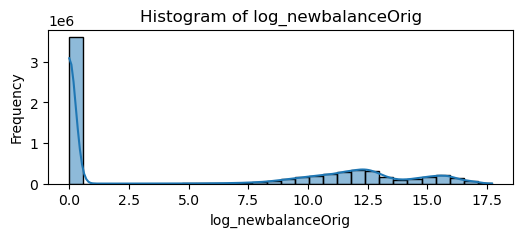

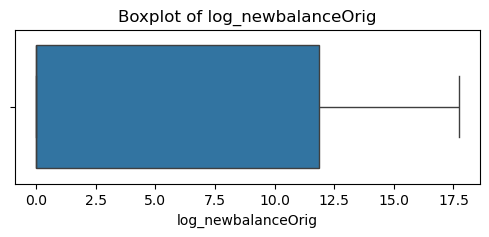

--- log_oldbalanceDest ---
count    6.362620e+06
mean     7.722420e+00
std      6.747637e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.179590e+01
75%      1.375686e+01
max      1.969049e+01
Name: log_oldbalanceDest, dtype: float64


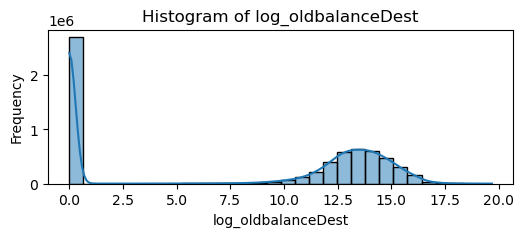

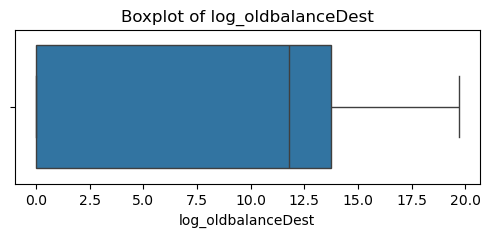

--- log_newbalanceDest ---
count    6.362620e+06
mean     8.330604e+00
std      6.675095e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.227682e+01
75%      1.392159e+01
max      1.969094e+01
Name: log_newbalanceDest, dtype: float64


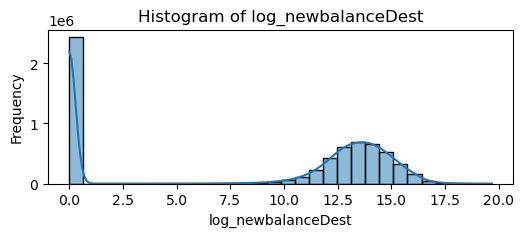

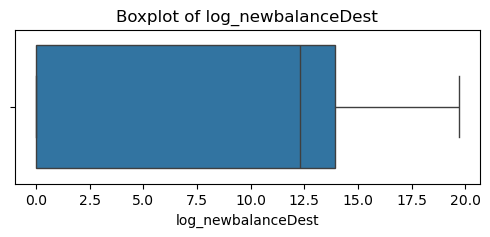

--- day ---
count    6.362620e+06
mean     9.503158e+00
std      5.922111e+00
min      0.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      3.000000e+01
Name: day, dtype: float64


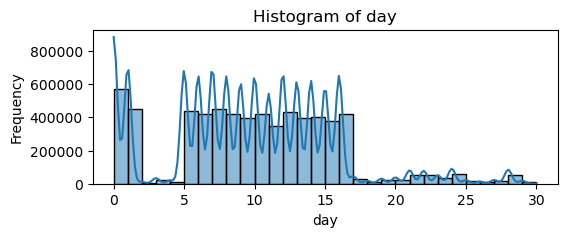

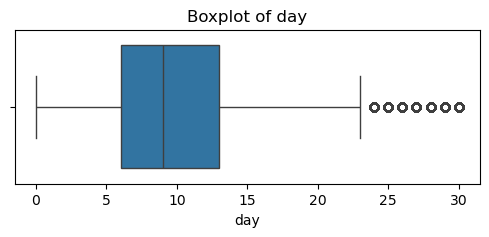

--- hour ---
count    6.362620e+06
mean     1.532145e+01
std      4.321799e+00
min      0.000000e+00
25%      1.200000e+01
50%      1.600000e+01
75%      1.900000e+01
max      2.300000e+01
Name: hour, dtype: float64


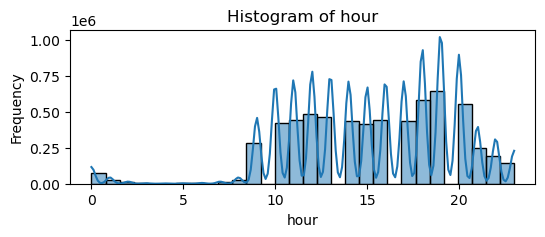

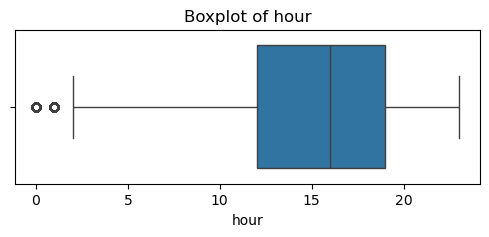

In [61]:


# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    print(f"--- {col} ---")
    print(df[col].describe())  # basic stats

    # Histogram
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical Univariate:

--- type ---
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64




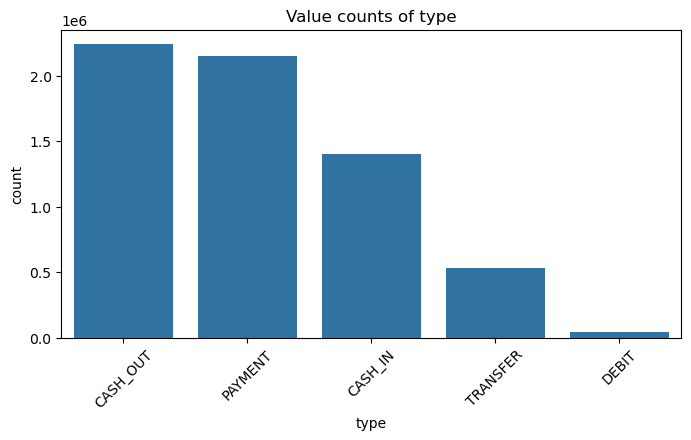

--- step_segment ---
step_segment
mid      3404848
early    2382182
late      472017
final     103573
Name: count, dtype: int64




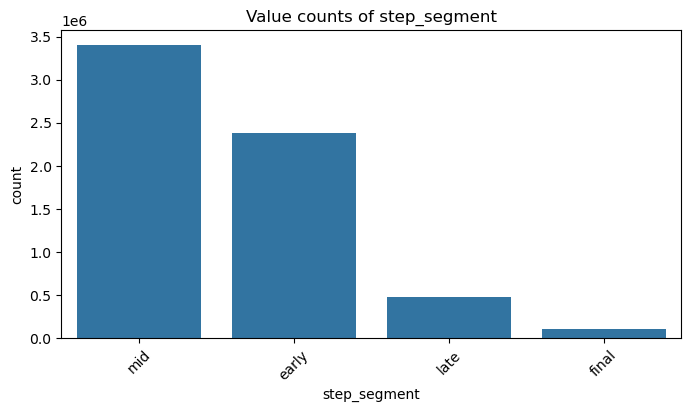

In [63]:
# Filter categorical columns 
exclude = ['orig_dest','nameOrig','nameDest']
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

    # Countplot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Value counts of {col}")
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysisi*******************************

#### Chi-Square test code for type vs isFraud

In [67]:
contingency_table = pd.crosstab(df['type'],df['isFraud'])
print('contingency_table:')
print(contingency_table)



contingency_table:
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


In [71]:

# Create a contingency table between 'type' and 'isFraud'
contingency_table = pd.crosstab(df['type'], df['isFraud'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the test statistics
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
print("\nExpected Frequencies:")
print(expected)
# Set significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print( "Reject the null hypothesis: There is a significant association between 'type' and 'isFraud'.")
else:
    print("Fail to reject the null hypothesis: No significant association between 'type' and 'isFraud'.")


Contingency Table:
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097

Chi-Square Statistic: 22082.53571319108
Degrees of Freedom: 4
P-value: 0.0

Expected Frequencies:
[[1.39747778e+06 1.80622440e+03]
 [2.23461179e+06 2.88821075e+03]
 [4.13785187e+04 5.34812728e+01]
 [2.14871781e+06 2.77719374e+03]
 [5.32221110e+05 6.87889834e+02]]
Reject the null hypothesis: There is a significant association between 'type' and 'isFraud'.


### There is a statistically significant relationship between transaction type and fraud occurrence. Specifically, fraud cases only appear in TRANSFER and CASH_OUT, while other types such as CASH_IN, DEBIT, and PAYMENT show no fraud at all.This finding can be used for feature engineering or fraud pattern detection in the modeling phase.



# Correlation (Pearson)

In [75]:
# Correlation matrix for only log-transformed numeric features
log_cols = ['log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest', 'log_newbalanceDest']

df[log_cols].corr(method='pearson')


,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_oldbalanceDest,log_newbalanceDest
log_amount,1.000000,0.041134,-0.108291,0.612229,0.684925
log_oldbalanceOrg,0.041134,1.000000,0.754680,0.007651,0.026866
log_newbalanceOrig,-0.108291,0.754680,1.000000,0.024227,-0.101687
log_oldbalanceDest,0.612229,0.007651,0.024227,1.000000,0.877273
log_newbalanceDest,0.684925,0.026866,-0.101687,0.877273,1.000000


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_17455/1476416979.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


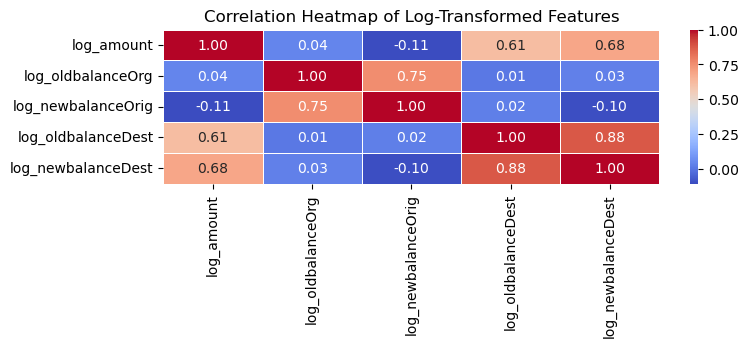

In [77]:


log_cols = ['log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig', 
            'log_oldbalanceDest', 'log_newbalanceDest']

# Compute correlation matrix
corr_matrix = df[log_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Log-Transformed Features")
plt.tight_layout()
plt.show()



# MannWhitneyU Test

In [80]:

# --- Hypotheses ---
# H0 (Null Hypothesis): Distribution of 'amount' is the same for fraud and non-fraud transactions
# H1 (Alternative Hypothesis): Distribution of 'amount' is different between fraud and non-fraud transactions

# --- Assumptions ---
# - Data is independent 
# - 'amount' is continuous 
# - Non-normal distribution is acceptable 

# Create two groups based on isFraud
fraud_amount = df[df['isFraud'] == 1]['amount']
nonfraud_amount = df[df['isFraud'] == 0]['amount']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(nonfraud_amount, fraud_amount, alternative='two-sided')

# Print results
print("🔎 Mann-Whitney U Test for 'amount' between Fraud and Non-Fraud Transactions")
print(f"U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(" Reject H0: The distribution of 'amount' is significantly different between fraud and non-fraud.")
else:
    print(" Fail to reject H0: No significant difference in 'amount' between fraud and non-fraud.")


🔎 Mann-Whitney U Test for 'amount' between Fraud and Non-Fraud Transactions
U statistic: 10963745080.00
P-value: 0.000000
 Reject H0: The distribution of 'amount' is significantly different between fraud and non-fraud.


# ANOVA

In [83]:
# Example: compare amount across step_segment
groups = [group['amount'].values for name, group in df.groupby('step_segment')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_val}")


/var/folders/43/0xfmd9ss7d73pj4cwk4r4m180000gn/T/ipykernel_17455/1257234514.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['amount'].values for name, group in df.groupby('step_segment')]


F-statistic: 1941.7004612730982, P-value: 0.0


#### The F-statistic is a large number, which indicates that there are significant differences in the mean transaction amount among the four simulation step groups.
#### Additionally, the P-value is 0, which means we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean transaction amount between the four groups: early, mid, late, and final.

## Checking Pairwise Correlation (Collinearity)

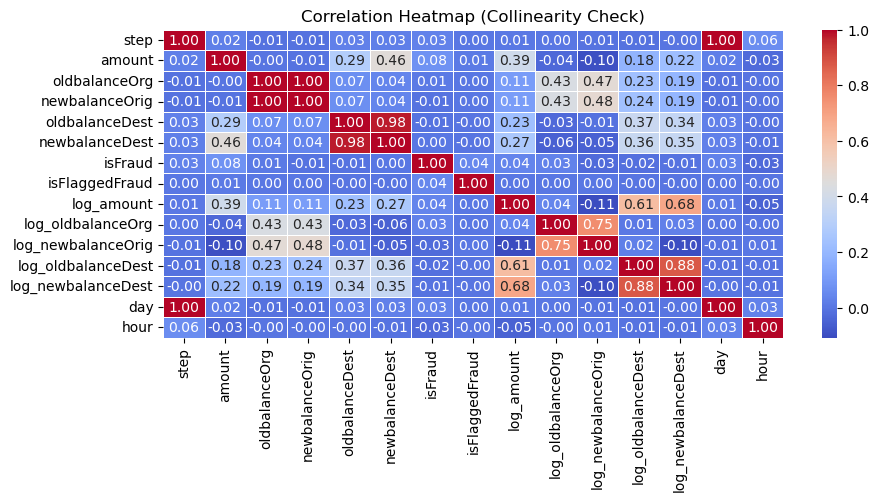

In [88]:
# Select only numeric features
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Collinearity Check)")
plt.show()

In [33]:
df['log_delta_orig'] = df['log_oldbalanceOrg'] - df['log_newbalanceOrig']
df['log_delta_dest'] = df['log_newbalanceDest'] - df['log_oldbalanceDest']
#These features (log_delta_orig and log_delta_dest) are useful for detecting fraud and should be included in your model.

In [35]:
# Show summary statistics for log difference in originator balance
print(df['log_delta_orig'].describe())

# Show summary statistics for log difference in destination balance
print(df['log_delta_dest'].describe())

# Display first 10 rows of log balances and their difference for originator
print(df[['log_oldbalanceOrg', 'log_newbalanceOrig', 'log_delta_orig']].head(10))

# Calculate the percentage of rows where delta_orig is exactly zero
print("Zero deltas (orig):", (df['log_delta_orig'] == 0).mean())

# Calculate the percentage of rows where delta_dest is exactly zero
print("Zero deltas (dest):", (df['log_delta_dest'] == 0).mean())


count    6.362620e+06
mean     2.048482e+00
std      4.247922e+00
min     -1.360869e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.791451e+00
max      1.611810e+01
Name: log_delta_orig, dtype: float64
count    6.362620e+06
mean     6.081839e-01
std      3.325781e+00
min     -1.638513e+01
25%      0.000000e+00
50%      0.000000e+00
75%      2.149478e-01
max      1.800983e+01
Name: log_delta_dest, dtype: float64
   log_oldbalanceOrg  log_newbalanceOrig  log_delta_orig
0          12.044359           11.984786        0.059573
1           9.964112            9.872292        0.091820
2           5.204007            0.000000        5.204007
3           5.204007            0.000000        5.204007
4          10.634773           10.305174        0.329599
5          10.894162           10.737337        0.156825
6          12.118312           12.078740        0.039571
7          12.078740           12.033067        0.045673
8           7.890583            0.000000        7.890583
9   

###### Around 33% of transactions have no change in the sender’s balance (log_delta_orig = 0), which might mean no real money movement.

###### Around 36% of transactions show no change in the receiver’s balance (log_delta_dest = 0), which is unusual, especially if money was sent. This can be a sign of fraud or fake accounts.

###### There are also negative deltas, meaning the balance after the transaction is higher than before which is illogical and may indicate suspicious behavior.



## Variance Inflation Factor (VIF) – for Multicollinearity

In [94]:


# Drop non-numeric or identifier columns
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 
        'oldbalanceDest', 'newbalanceDest', 'log_amount', 
        'log_oldbalanceOrg', 'log_newbalanceOrig', 
        'log_oldbalanceDest', 'log_newbalanceDest']]

# Add intercept
X_const = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

vif_data.sort_values("VIF", ascending=False)


,Feature,VIF
2,newbalanceOrig,525.918668
1,oldbalanceOrg,517.692103
4,newbalanceDest,78.728571
3,oldbalanceDest,68.405719
9,log_newbalanceDest,6.125824
8,log_oldbalanceDest,5.420023
0,amount,4.254476
7,log_newbalanceOrig,3.592015
6,log_oldbalanceOrg,2.908621
5,log_amount,2.364042


In [37]:
# Delta for sender (Original account): how much balance decreased
df['log_delta_orig'] = df['log_oldbalanceOrg'] - df['log_newbalanceOrig']

# Delta for receiver (Destination account): how much balance increased
df['log_delta_dest'] = df['log_newbalanceDest'] - df['log_oldbalanceDest']


In [39]:
# 1 if sender's balance didn't change → possible fake transaction
df['is_orig_balance_unchanged'] = (df['log_delta_orig'] == 0).astype(int)

# 1 if receiver's balance didn't change → possible fake receiver
df['is_dest_balance_unchanged'] = (df['log_delta_dest'] == 0).astype(int)

# 1 if balance after transaction is more than before → illogical
df['is_dest_delta_negative'] = (df['log_delta_dest'] < 0).astype(int)


In [41]:
df.drop(['log_delta_orig', 'log_delta_dest'], axis=1, inplace=True)


In [43]:
# Drop identifier-like columns
df_encoded = df.drop(columns=['nameOrig', 'nameDest'])

# One-hot encode categorical variables (drop_first=True to avoid multicollinearity)
df_encoded = pd.get_dummies(df_encoded, columns=['type', 'step_segment'], drop_first=True)

# Convert all True/False columns to 1/0
df_encoded = df_encoded.astype(int)

# Check result
df_encoded.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,log_oldbalanceOrg,...,is_orig_balance_unchanged,is_dest_balance_unchanged,is_dest_delta_negative,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step_segment_mid,step_segment_late,step_segment_final
0,1,9839,170136,160296,0,0,0,0,9,12,...,0,1,0,0,0,1,0,0,0,0
1,1,1864,21249,19384,0,0,0,0,7,9,...,0,1,0,0,0,1,0,0,0,0
2,1,181,181,0,0,0,1,0,5,5,...,0,1,0,0,0,0,1,0,0,0
3,1,181,181,0,21182,0,1,0,5,5,...,0,0,1,1,0,0,0,0,0,0
4,1,11668,41554,29885,0,0,0,0,9,10,...,0,1,0,0,0,1,0,0,0,0


In [45]:

# Define features (X) and target (y)
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shape of result
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (5090096, 24)
X_test shape: (1272524, 24)
y_train distribution:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
y_test distribution:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [47]:

robust_scalar = RobustScaler()
x_train_scaled = robust_scalar.fit_transform(X_train)
x_test_scaled =robust_scalar.transform(X_test)

In [49]:
# Train logistic regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(x_train_scaled, y_train)

# Predict using logistic regression
y_pred_logreg = logreg.predict(x_test_scaled)

# Evaluate logistic regression
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logreg))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.99      0.11      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.98      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524

Confusion Matrix:
 [[1243659   27222]
 [     22    1621]]
Accuracy: 0.9785905806098746
ROC AUC Score: 0.9825950366329067


In [50]:
# Train decision tree classifier
dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
dtree.fit(x_train_scaled, y_train)

# Predict using decision tree
y_pred_tree = dtree.predict(x_test_scaled)

# Evaluate decision tree
print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tree))



Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.07      0.98      0.14      1643

    accuracy                           0.98   1272524
   macro avg       0.54      0.98      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524

Confusion Matrix:
 [[1250825   20056]
 [     40    1603]]
Accuracy: 0.9842077634685082
ROC AUC Score: 0.9799365561814852


In [51]:
# Train score
train_preds_log = logreg.predict(x_train_scaled)
train_score_log = accuracy_score(y_train, train_preds_log)

# Test score
test_score_log = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression - Train Accuracy:", train_score_log)
print("Logistic Regression - Test Accuracy:", test_score_log)


Logistic Regression - Train Accuracy: 0.9787165114371124
Logistic Regression - Test Accuracy: 0.9785905806098746


###### No Overfitting or Underfitting observed.
###### Both models are learning well and generalizing to unseen data properly.



In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [58]:
model = RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=42, verbose=1)


In [60]:
from sklearn.model_selection import train_test_split

X_sampled, _, y_sampled, _ = train_test_split(
    X_resampled, y_resampled,
    train_size=100000,
    stratify=y_resampled,  
    random_state=42
)


In [61]:

model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model.fit(X_sampled, y_sampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
print("\nROC AUC Score:\n", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[1265795    5086]
 [     68    1575]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.24      0.96      0.38      1643

    accuracy                           1.00   1272524
   macro avg       0.62      0.98      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC AUC Score:
 0.9990996014164807


In [66]:
from collections import Counter
counter = Counter(y_resampled)
print(counter)


Counter({0: 5083526, 1: 5083526})


In [68]:
print(X_resampled.shape)


(10167052, 24)


In [70]:

X_resampled_small = X_resampled.sample(n=1000000, random_state=42)
y_resampled_small = y_resampled.loc[X_resampled_small.index]


In [72]:

y_pred = model.predict(X_test)  
y_prob = model.predict_proba(X_test)[:, 1]  


In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score 
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[1265795    5086]
 [     68    1575]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.24      0.96      0.38      1643

    accuracy                           1.00   1272524
   macro avg       0.62      0.98      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC AUC Score:
0.9990996014164807


In [76]:
target = 'log_amount'  
X = df.drop(columns=[target])
y = df[target]


In [78]:

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Encode 'type' only
X_train_encoded = pd.get_dummies(X_train, columns=['type','step_segment'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['type','step_segment'], drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Drop the others
X_train_encoded = X_train_encoded.drop(columns=['nameOrig', 'nameDest'])
X_test_encoded = X_test_encoded.drop(columns=['nameOrig', 'nameDest'])




In [82]:
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = lr_model.predict(X_test_encoded)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 1.0569413238466616
R2 Score: 0.6794098812434406


In [84]:
X.select_dtypes(include=['object', 'category']).columns


Index(['type', 'nameOrig', 'nameDest', 'step_segment'], dtype='object')

In [86]:
X = df.drop(columns=[target, 'nameOrig', 'nameDest'])
X = pd.get_dummies(X, columns=['type','step_segment'], drop_first=True)


In [88]:
# Drop useless ID-like features – they don't help model learn
X_train = X_train.drop(['nameOrig', 'nameDest'], axis=1)
X_test = X_test.drop(['nameOrig', 'nameDest'], axis=1)





In [90]:
######## Step 1: Encode both sets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Align the columns (important!)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Step 3: Fit model
lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)

# Step 4: Predict using the encoded test set
y_pred_lr = lr_model.predict(X_test_encoded)


In [92]:
print("Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression
R2 Score: 0.6794098812434406
RMSE: 1.0280765165330163


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² Score: 0.676
This means your model explains about 67.6% of the variance in the target variable (y_test).
It is a decent score — not bad, but there’s room for improvement.

RMSE (Root Mean Squared Error): 1.03
On average, the model’s predictions are off by about 1 unit (depending on the target variable’s scale).

The target has larger values, the error may be acceptable.


Try Non-linear Models
→ Linear regression is simple. Models like the following may give better performance:

RandomForestRegressor

XGBoostRegressor



In [95]:
# Create the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train_encoded, y_train)


DecisionTreeRegressor(random_state=42)

In [97]:
# Predict on the test set
y_pred_tree = tree_model.predict(X_test_encoded)


In [99]:
print("Decision Tree Regression")
print("R2 Score:", r2_score(y_test, y_pred_tree))
print("RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))


Decision Tree Regression
R2 Score: 0.9999999963508207
RMSE: 0.0001096851849029836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Very high accuracy on the test set

But potentially overfitted (especially if the training score is also perfect — check r2_score(y_train, y_train_pred))

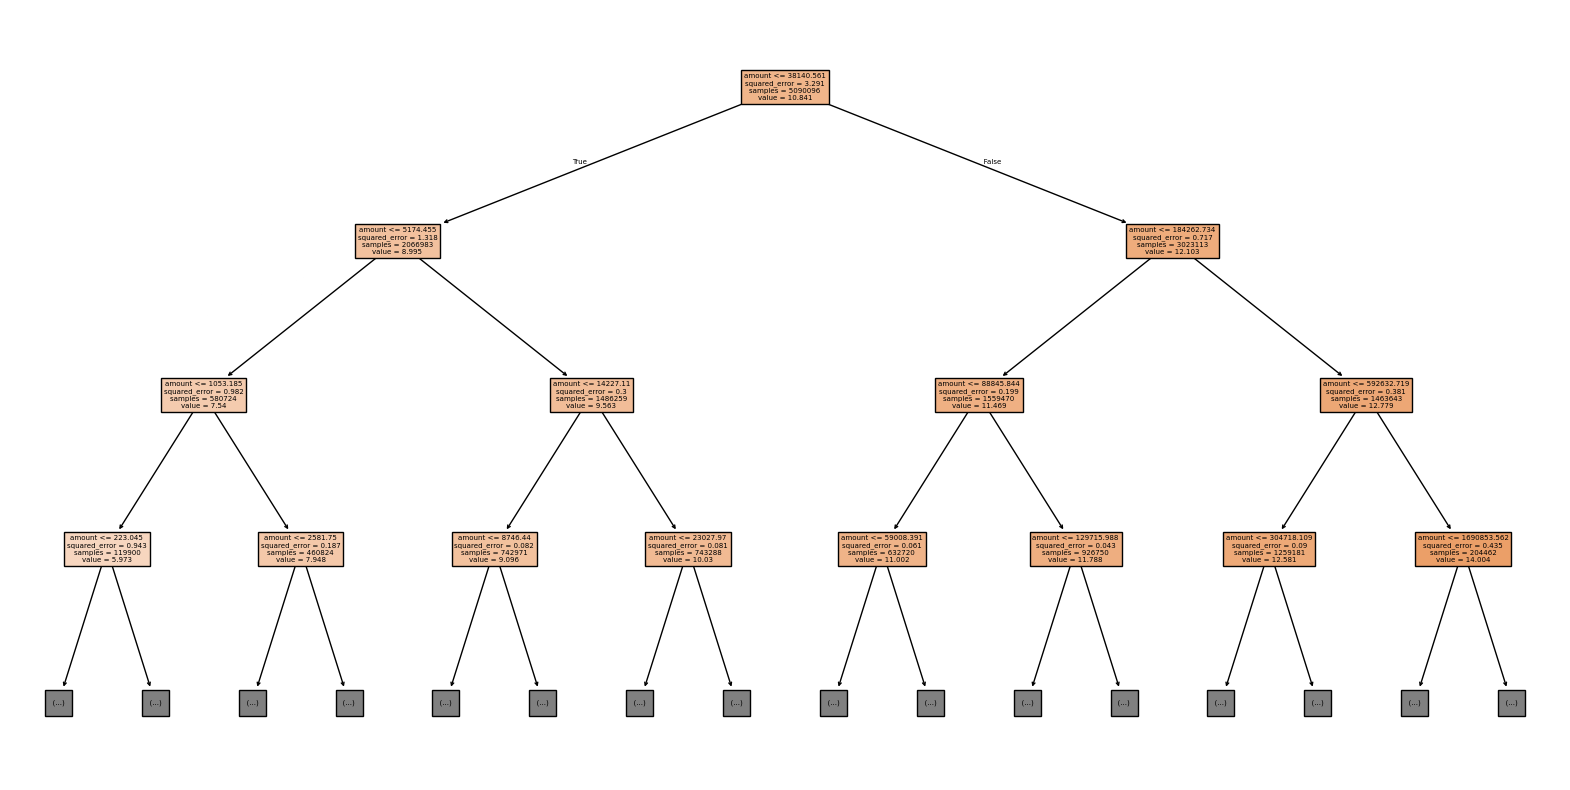

In [102]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X_train_encoded.columns, max_depth=3)
plt.show()

In [104]:
from sklearn.metrics import r2_score


y_train_pred = tree_model.predict(X_train_encoded)
y_test_pred = tree_model.predict(X_test_encoded)

from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Train R2: 0.999999999999999
Test R2: 0.9999999963508207


## Check for validity of assumptions (LINE)

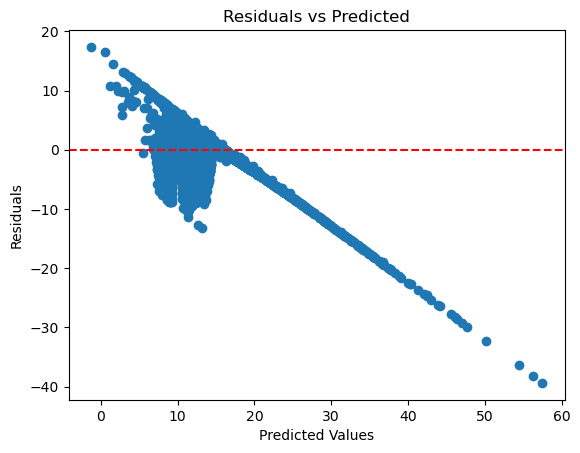

In [107]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


The linear regression model doesn’t fit the data well.

The pattern shows non-linearity and non-constant variance.

You might want to use a non-linear model, such as:

Decision Tree Regressor (you already tried)

Random Forest Regressor

Gradient Boosting Regressor

or apply feature transformations

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define models
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# KFold setup (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R2 Score
print("=== Linear Regression R2 ===")
r2_scores_lr = cross_val_score(lr_model, X_train_encoded, y_train, cv=kf, scoring='r2')
print("R2 scores:", r2_scores_lr)
print("Average R2:", np.mean(r2_scores_lr))

print("\n=== Decision Tree R2 ===")
r2_scores_dt = cross_val_score(tree_model, X_train_encoded, y_train, cv=kf, scoring='r2')
print("R2 scores:", r2_scores_dt)
print("Average R2:", np.mean(r2_scores_dt))

# RMSE
print("\n=== Linear Regression RMSE ===")
rmse_scores_lr = cross_val_score(lr_model, X_train_encoded, y_train, cv=kf,
                                 scoring=make_scorer(mean_squared_error, squared=False))
print("RMSE scores:", rmse_scores_lr)
print("Average RMSE:", np.mean(rmse_scores_lr))

print("\n=== Decision Tree RMSE ===")
rmse_scores_dt = cross_val_score(tree_model, X_train_encoded, y_train, cv=kf,
                                 scoring=make_scorer(mean_squared_error, squared=False))
print("RMSE scores:", rmse_scores_dt)
print("Average RMSE:", np.mean(rmse_scores_dt))


=== Linear Regression R2 ===


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

lr = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(lr, X_train_encoded, y_train, cv=kfold, scoring='r2')
print("R2 Scores from K-Fold:", r2_scores)
print("Mean R2:", r2_scores.mean())
